In [458]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import KFold, cross_validate, cross_val_predict
from sklearn.metrics import confusion_matrix,make_scorer
data=pd.read_csv('/Users/saketmanolkar/Downloads/Dataset1.csv')
data
      

,Phone Usage,Income_Source,Living_Place,Current_Carrier,Change_Plan
0,>150,1,Town,AT&T,Yes
1,<75,1,Town,AT&T,No
2,<75,2,City,Sprint,No
3,75...150,2,City,MCI,Yes
4,75...150,2,City,Sprint,Yes
5,75...150,1,Town,MCI,Yes
6,75...150,2,City,AT&T,Yes
7,<75,1,City,Sprint,No
8,>150,1,City,MCI,Yes
9,<75,2,Town,AT&T,No


In [459]:
#This pice of code encodes all the string into binary
#Conversion of string to binary allows us to process data effectively
for col in data.dtypes[data.dtypes=="object"].index:
    for_dummy= data.pop(col)
    data=pd.concat([data,pd.get_dummies(for_dummy,prefix=col)],axis=1)
    print(data)

    Income_Source Living_Place Current_Carrier Change_Plan  \
0               1         Town            AT&T         Yes   
1               1         Town            AT&T          No   
2               2         City          Sprint          No   
3               2         City             MCI         Yes   
4               2         City          Sprint         Yes   
5               1         Town             MCI         Yes   
6               2         City            AT&T         Yes   
7               1         City          Sprint          No   
8               1         City             MCI         Yes   
9               2         Town            AT&T          No   
10              2         Town          Sprint         Yes   
11              2         Town             MCI         Yes   
12              2         Town             MCI         Yes   
13              2         City            AT&T          No   
14              2         City             MCI          No   
15      

In [460]:
#We define the coloumn "Change_Plan_No" in our dataset as the label for the model
labels=data.pop("Change_Plan_No")

In [461]:
#This particular library allows us to split training dataset from the test dataset

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
x_train,x_test,y_train,y_test=train_test_split(data,labels,test_size = 0.20)


In [462]:
def calculation():
    
    cnf_matrix=confusion_matrix(y_test, y_pred)
    print("Confusion matrix is:")
    print(cnf_matrix)

    FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)
    FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
    TP = np.diag(cnf_matrix)
    TN = cnf_matrix.sum() - (FP + FN + TP)

    FP = FP.astype(float)
    print('FP: '+str(FP))
    FN = FN.astype(float)
    print('FN: '+str(FN))
    TP = TP.astype(float)
    print('TP: '+str(TP))
    TN = TN.astype(float)
    print('TN: '+str(TN))
    #True Positive rate 
    TPR = TP/(TP + FN) 
    print('TPR: '+str(TPR))
    #false positive rate
    FPR = FP/(FP+TN)
    print('FPR: '+str(FPR))
    #False negative rate
    FNR = FN/(TP+FN)
    print('FNR: '+str(FNR))
    #True Negative Rate
    TNR = TN/(TN + FP)
    print('TNR: '+str(TNR))
    #Recall (r) or sensitivity
    r = TP/(TP + FN)
    print('r or sesitivity: '+str(r))
    #F1 measure (F1)
    F1 = (2 *TP)/(2 *TP + FP + FN)
    print('F1: '+str(F1))
    #Accuracy (Acc)
    Acc = (TP + TN)/(TP + FP + FN + TN)
    print('Acc: '+str(Acc))
    #Error rate (Err)
    Err = (FP + FN)/(TP + FP + FN + TN)
    print('Err: '+str(Err))

    #ROC Curve
    plt.plot(FPR, TPR,'o')
    plt.plot(FPR, TPR,'b')
    plt.suptitle('ROC curve')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
   

0.75
y_pred : [1 1 0 0]
Confusion matrix is:
[[1 0]
 [1 2]]
FP: [1. 0.]
FN: [0. 1.]
TP: [1. 2.]
TN: [2. 1.]
TPR: [1.         0.66666667]
FPR: [0.33333333 0.        ]
FNR: [0.         0.33333333]
TNR: [0.66666667 1.        ]
r or sesitivity: [1.         0.66666667]
F1: [0.66666667 0.8       ]
Acc: [0.75 0.75]
Err: [0.25 0.25]
None


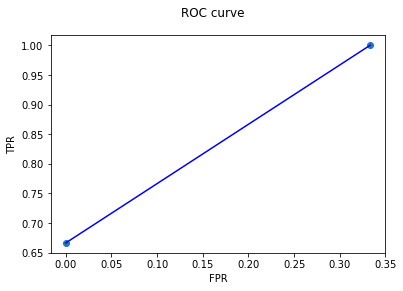

In [463]:
#rf is defined as the funciontion RandomForestClassifier() 
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print(rf.score(x_test,y_test))
print("y_pred :",y_pred)
print(calculation())

In [464]:
cv = KFold(n_splits=10,random_state=1,shuffle=True)
scores = cross_validate(rf,x_train,y_train,scoring = "accuracy",cv=cv)
scores


{'fit_time': array([0.10420203, 0.06052971, 0.0600481 , 0.05989599, 0.05986786,
        0.05979514, 0.05978703, 0.05990815, 0.05989909, 0.06143498]),
 'score_time': array([0.00492311, 0.00463843, 0.00461388, 0.0045619 , 0.00458694,
        0.00454187, 0.00459003, 0.00454926, 0.00461197, 0.00496101]),
 'test_score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])}

0.5
y_pred : [1 0 0 0]
Confusion matrix is:
[[1 0]
 [2 1]]
FP: [2. 0.]
FN: [0. 2.]
TP: [1. 1.]
TN: [1. 1.]
TPR: [1.         0.33333333]
FPR: [0.66666667 0.        ]
FNR: [0.         0.66666667]
TNR: [0.33333333 1.        ]
r or sesitivity: [1.         0.33333333]
F1: [0.5 0.5]
Acc: [0.5 0.5]
Err: [0.5 0.5]
None


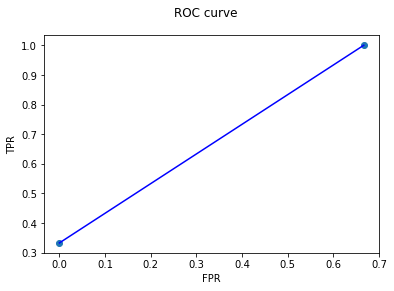

In [465]:
#Classifier is defined as the funciontion KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)
y_pred=classifier.predict(x_test)
print(classifier.score(x_test,y_test))
print("y_pred :",y_pred)
print(calculation())

In [466]:
cv = KFold(n_splits=10,random_state=1,shuffle=True)
scores = cross_validate(classifier,x_train,y_train,scoring = "accuracy",cv=cv)
scores

{'fit_time': array([0.00532603, 0.00324893, 0.00254488, 0.0024519 , 0.00190902,
        0.00159478, 0.00170803, 0.00161695, 0.00172997, 0.00163889]),
 'score_time': array([0.00431299, 0.00385213, 0.00256014, 0.00238299, 0.00168705,
        0.00162601, 0.00184989, 0.0016849 , 0.00174809, 0.00153708]),
 'test_score': array([1., 1., 1., 1., 1., 1., 1., 1., 0., 1.])}

0.25
y_pred : [0 0 0 0]
Confusion matrix is:
[[1 0]
 [3 0]]
FP: [3. 0.]
FN: [0. 3.]
TP: [1. 0.]
TN: [0. 1.]
TPR: [1. 0.]
FPR: [1. 0.]
FNR: [0. 1.]
TNR: [0. 1.]
r or sesitivity: [1. 0.]
F1: [0.4 0. ]
Acc: [0.25 0.25]
Err: [0.75 0.75]
None


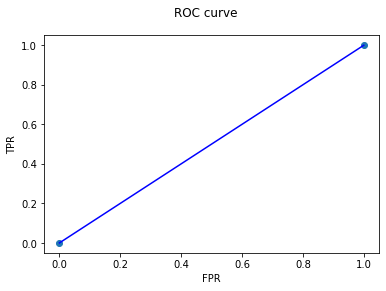

In [467]:
#lstm is defined as the funciontion MLPClassifier
from sklearn.neural_network import MLPClassifier
lstm=MLPClassifier(solver="lbfgs",alpha=1e-5,hidden_layer_sizes=(5,2),random_state=1)
lstm.fit(x_train,y_train)
y_pred=lstm.predict(x_test)
print(lstm.score(x_test,y_test))
print("y_pred :",y_pred)
print(calculation())

In [468]:
cv = KFold(n_splits=10,random_state=1,shuffle=True)
scores = cross_validate(lstm,x_train,y_train,scoring = "accuracy",cv=cv)
scores

{'fit_time': array([0.01852918, 0.01517487, 0.01303792, 0.00972795, 0.00688195,
        0.00728726, 0.00669599, 0.00569487, 0.00507092, 0.00627923]),
 'score_time': array([0.00187683, 0.00166202, 0.00111914, 0.00086093, 0.00079012,
        0.00073695, 0.00062609, 0.00063109, 0.00072098, 0.00065184]),
 'test_score': array([0.5, 1. , 1. , 1. , 1. , 1. , 1. , 1. , 0. , 1. ])}